# 1 Clustering - K-Means, DBSCAN, Hierarchical

• Segment mall customers based on their behavioural segments

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("C:/Users/RUCHIR/Desktop/customersegmentationdataset/Mall_Customers.csv")

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [17]:
df.shape

(200, 4)

In [18]:
 df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
pd.DataFrame(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


<AxesSubplot:ylabel='Age'>

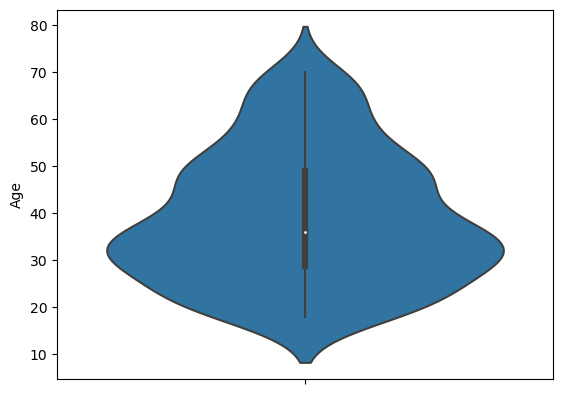

In [21]:
 sns.axes_style("dark")
sns.violinplot(y=df["Age"])


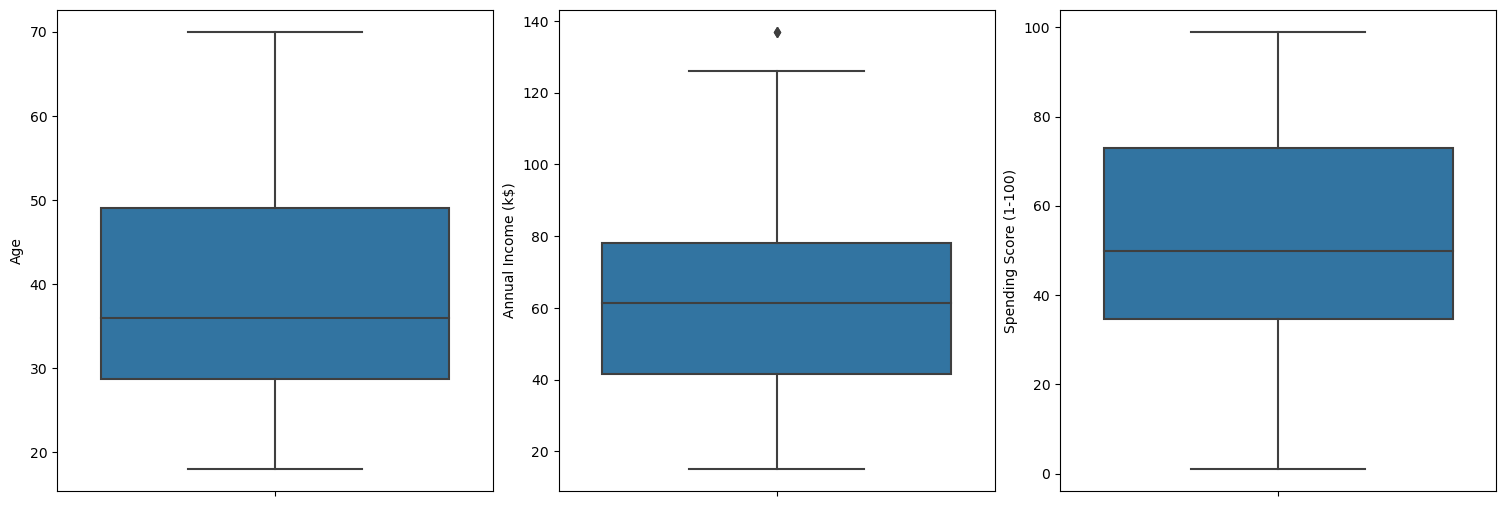

In [23]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Gender']:
        sns.boxplot(y = col, data = df, ax=ax[index])
        index += 1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


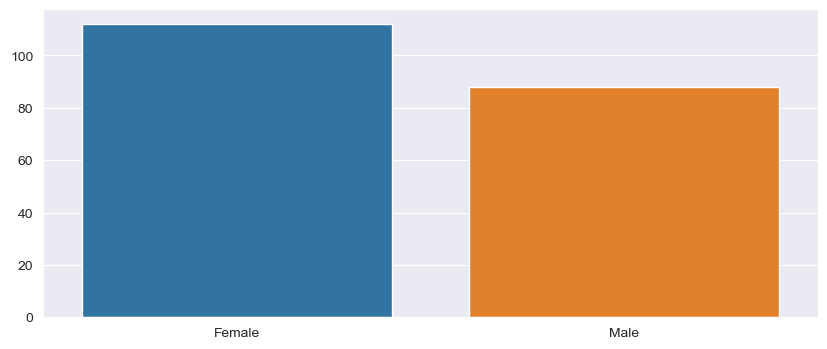

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x = df.Gender.value_counts().index, y = df.Gender.value_counts().values)
plt.show()

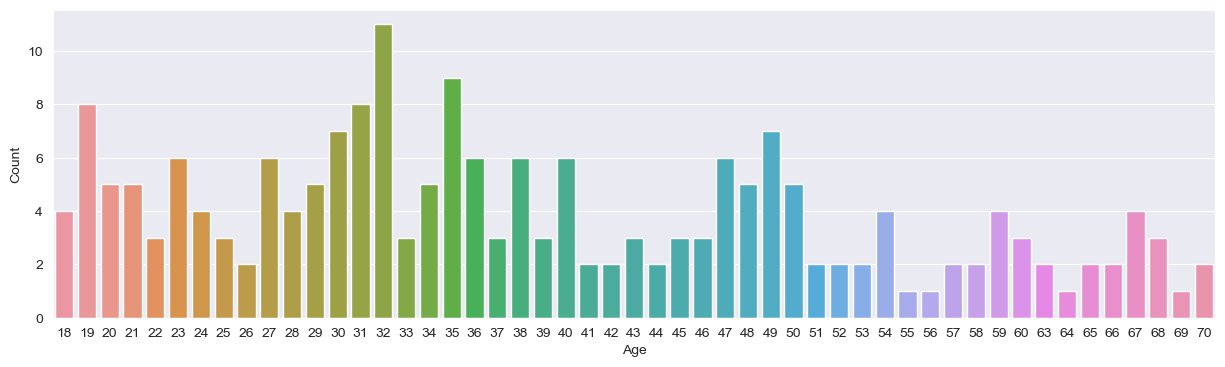

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,4))
sns.barplot(x = df.Age.value_counts().index, y = df.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

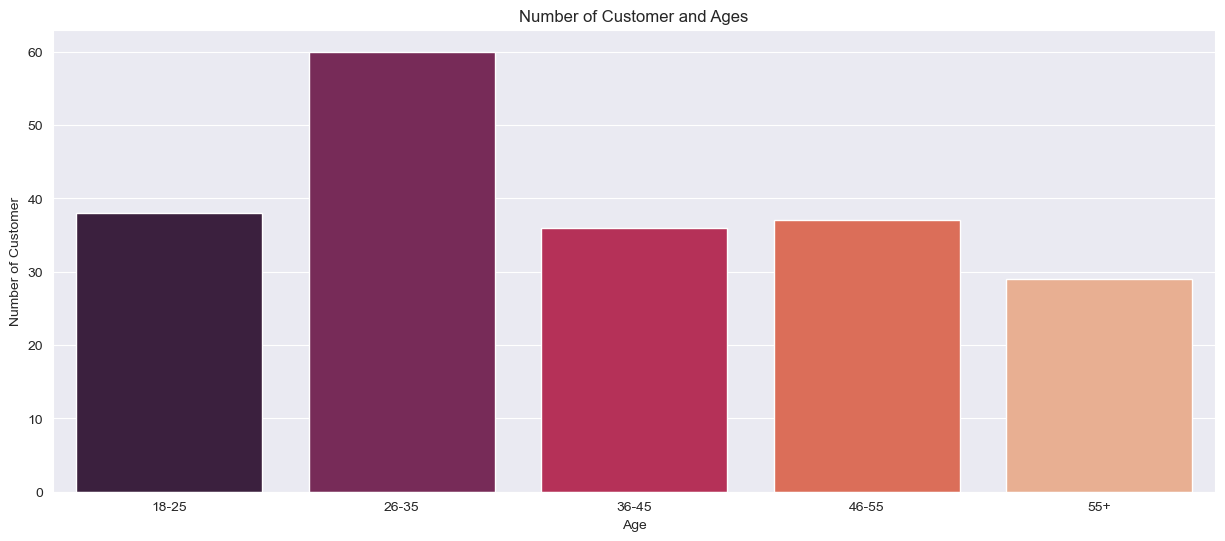

In [29]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

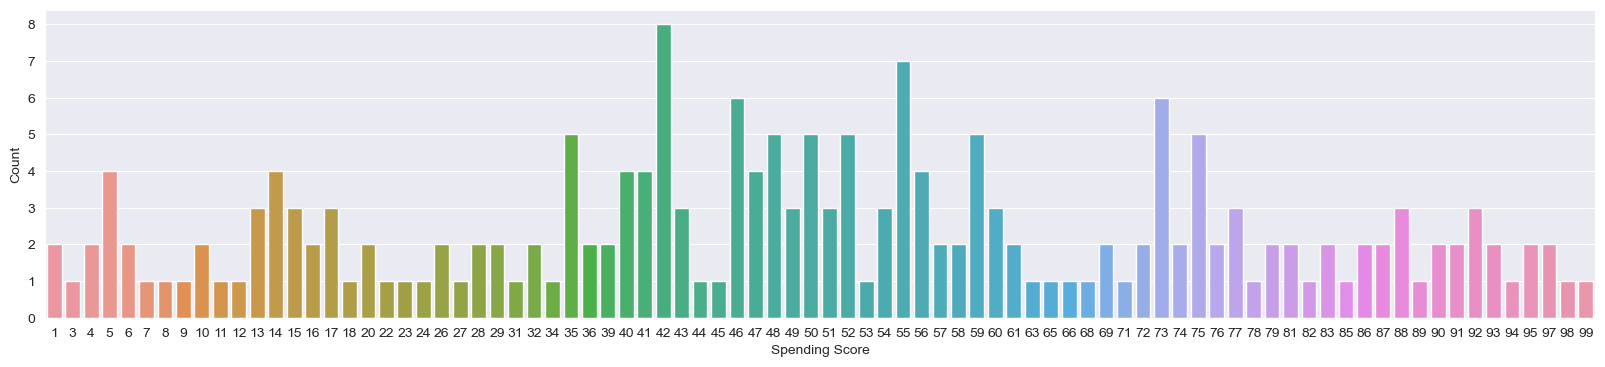

In [31]:
 sns.set_style("darkgrid")
plt.figure(figsize=(20,4))
sns.barplot(x = df['Spending Score (1-100)'].value_counts().index, y =df['Spending Score (1-100)'].value_counts().values)
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

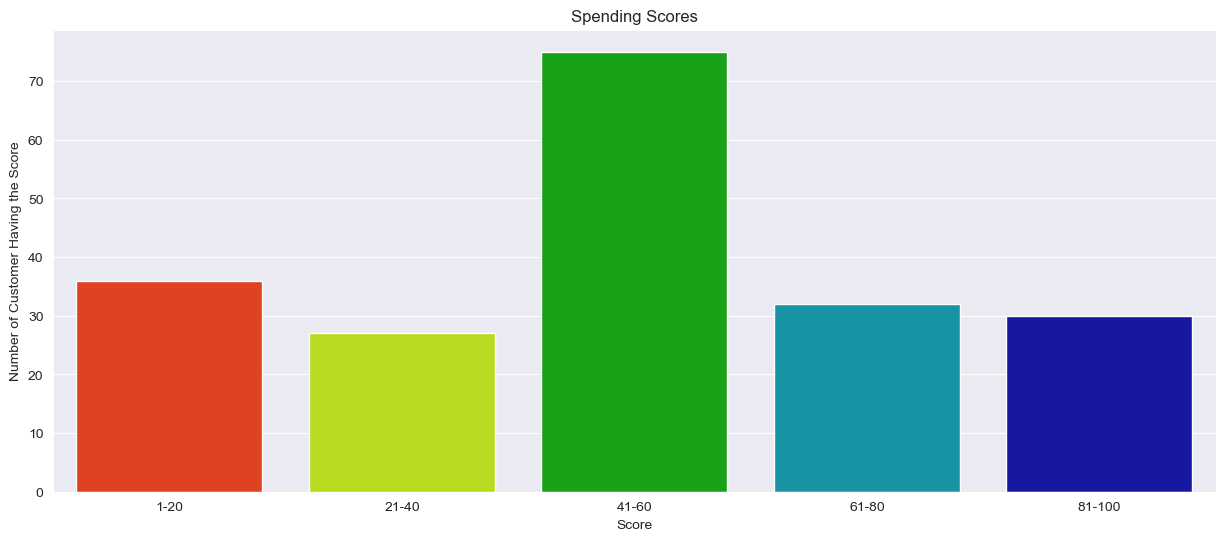

In [33]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) &(df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) &(df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) &(df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) &(df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) &(df["Spending Score (1-100)"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values),len(ss61_80.values), len(ss81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

In [34]:
 df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

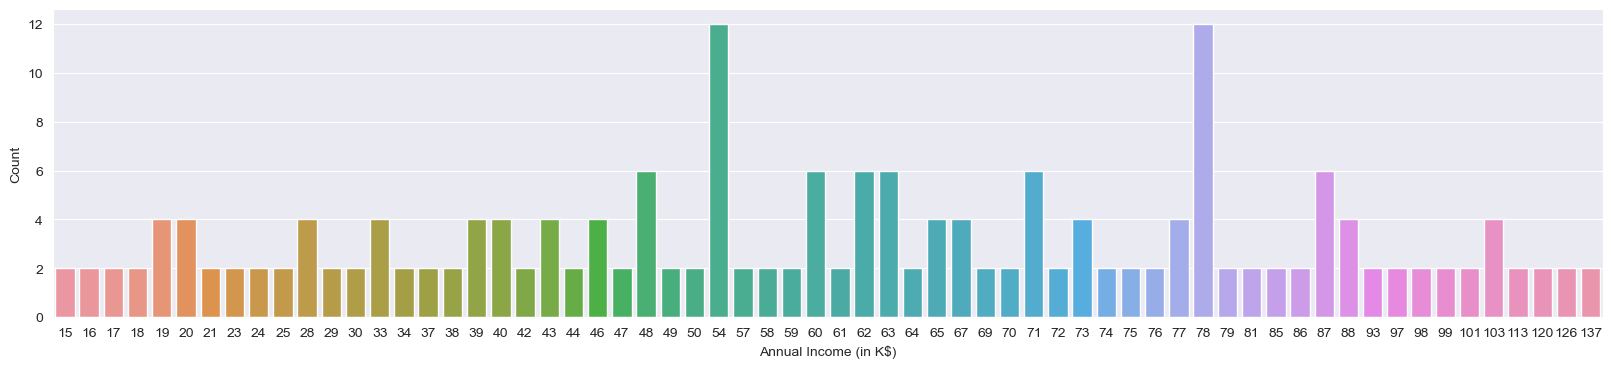

In [37]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,4))
sns.barplot(x = df['Annual Income (k$)'].value_counts().index, y = df['Annual Income (k$)'].value_counts().values)
plt.xlabel('Annual Income (in K$)')
plt.ylabel('Count')
plt.show()

# 2  ENCODING

In [38]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})

# 3 SCALING 

In [39]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)

# 4  K-Means

•The goal of K means is to group data points into distinct non-overlapping subgroups. One
of the major application of K means clustering is segmentation of customers to get a better
understanding of them which in turn could be used to increase the revenue of the company

• K-means algorithm identifies k number of centroids, and then allocates every data point to
the nearest cluster, while keeping the centroids as small as possible

#  4.1 Elbow Curve

The location of a bend (knee) in the plot is generally considered as an indicator of the
appropriate number of clusters

C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

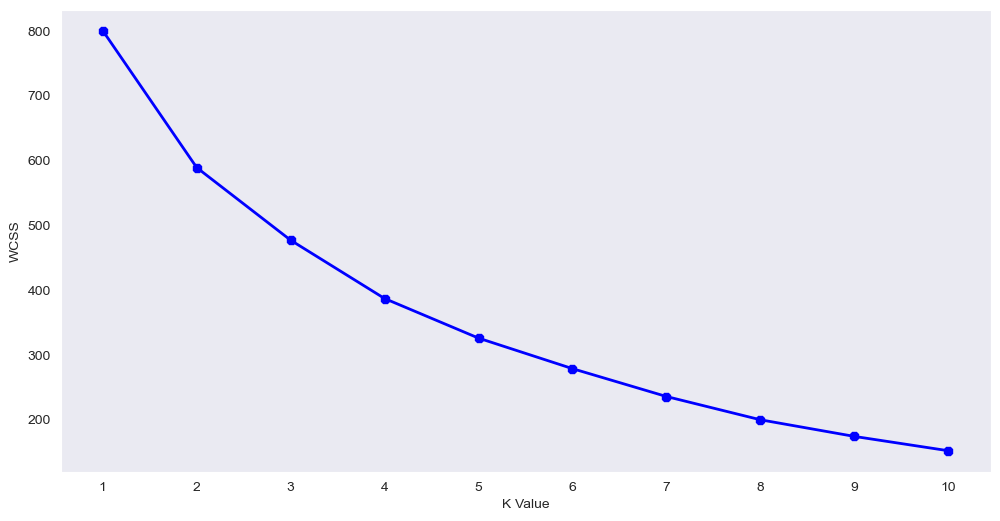

In [41]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [42]:
 from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# K = 5 

C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


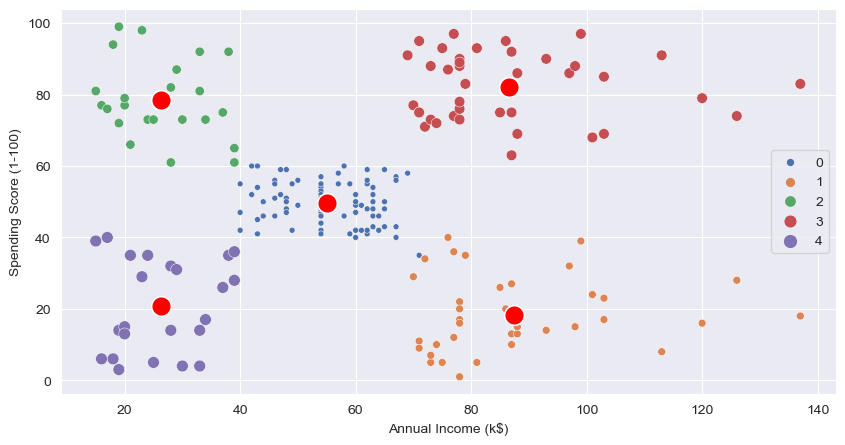

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the KMeans model
km = KMeans(n_clusters = 5)
clusters = km.fit_predict(df)
df['label'] = clusters
centroids = km.cluster_centers_

# Plot the data
plt.figure(figsize = (10,5))
# Pass the positional arguments as keyword arguments
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df.label, palette="deep", size=df.label)
sns.scatterplot(x=centroids[:,2], y=centroids[:,3], s=200, color='red')
plt.show()

C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


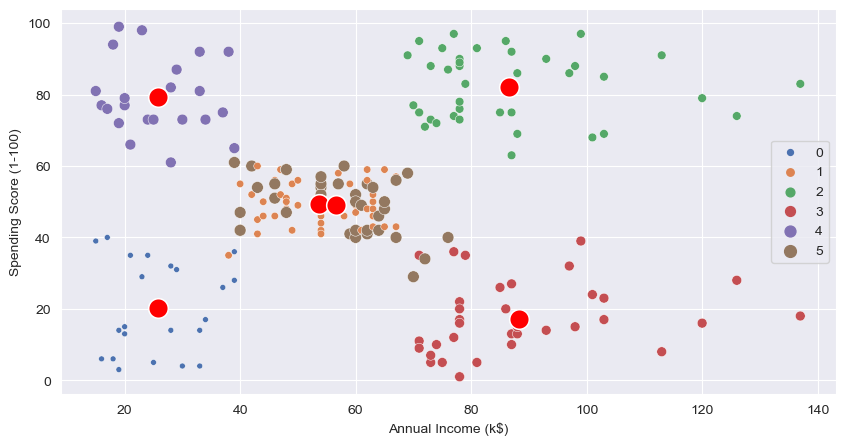

In [62]:
# Create the KMeans model
km = KMeans(n_clusters = 6)
clusters = km.fit_predict(df)
df['label'] = clusters
centroids = km.cluster_centers_

# Plot the data
plt.figure(figsize = (10,5))
# Pass the positional arguments as keyword arguments
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df.label, palette="deep", size=df.label)
sns.scatterplot(x=centroids[:,2], y=centroids[:,3], s=200, color='red')
plt.show()

Observation: * K=5 is none overlapping whereas in K=6 there overlap between 2 clusters

# 4.2 Evaluation

# 4.2.1 Silhouette Analysis

• The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point
is within-cluster (cohesion) compared to other clusters (separation)
• The value of the silhouette coefficient is between [-1, 1]
• A score of 1 denotes the best meaning that the data point i is very compact within the cluster
to which it belongs and far away from the other clusters. The worst value is -1. Values near
0 denote overlapping clusters

In [63]:
from sklearn.metrics import silhouette_score

C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

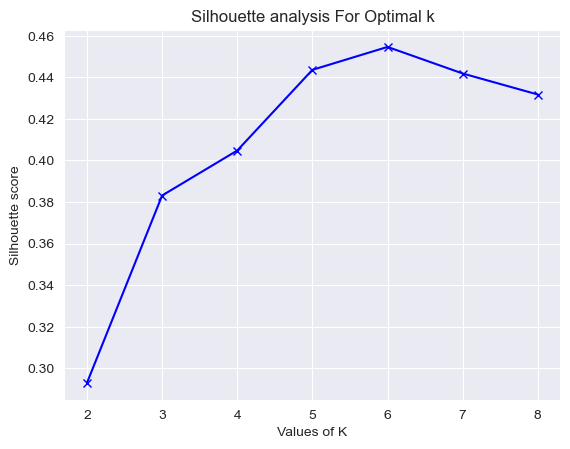

In [72]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    #"""silhouette score"""
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    #"initialise kmeans"
    silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Observation: * We can take either K=5 or K=6 but 5 clusters has been consdired because in 6
clusters there is overlapping

# 4.2.2 Davies–Bouldin index (DBI)

• The score is defined as the average similarity measure of each cluster with its most similar
cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
Thus, clusters which are farther apart and less dispersed will result in a better score

• Lower the DB index value, better is the clustering

C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

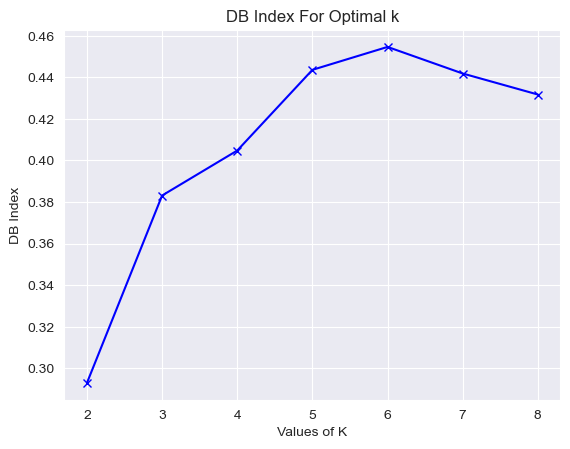

In [75]:
from sklearn.metrics import davies_bouldin_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
davies_bouldin_score_avg = []
for num_clusters in range_n_clusters:
#"""initialise kmeans"""
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
#"""silhouette score"""
    davies_bouldin_score_avg.append(davies_bouldin_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('DB Index')
plt.title('DB Index For Optimal k')
plt.show()



# 4.2.3 Dunn Index

• Dunn index to identify sets of clusters that are compact, with a small variance between members of the cluster, and well separated, where the means of different clusters are sufficiently
far apart, as compared to the within cluster variance

• It is calculated as the lowest intercluster distance (ie. the smallest distance between any
two cluster centroids) divided by the highest intracluster distance (ie. the largest distance
between any two points in any cluster)

• Higher the Dunn index value, better is the clustering. The number of clusters that maximizes
Dunn index is taken as the optimal number of clusters k

Note: Due to library issue not able to comput DUNN index but you guys can try from your end

# 5 DBSCAN

• DBSCAN does not require us to specify the number of clusters, avoids outliers, and works
quite well with arbitrarily shaped and sized clusters. It does not have centroids, the clusters
are formed by a process of linking neighbor points together

In [76]:
from sklearn.cluster import DBSCAN

In [77]:
from sklearn import metrics
# Compute DBSCAN
db = DBSCAN(eps=0.45).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [78]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

Estimated number of clusters: 6
Estimated number of noise points: 137
Silhouette Coefficient: -0.109


# Hyerparameter Tuning

In [79]:
range_min = [x for x in range(2, 51, 1)]
range_eps = [x / 100.0 for x in range(1, 51, 1)]
# + <br />[y / 10.0 for y in range(1, 51, 1)] + <br />[round(z, 2) for z in np.arange(1.10, 1.31, 0.01)]
dic = {}
for m in range_min:
    for e in range_eps:
        model_1 = DBSCAN(eps = e, min_samples = m).fit(X)
        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)
        core_samples_mask[model_1.core_sample_indices_] = True
        labels = model_1.labels_
        df['label'] = labels
        if len( set(labels) ) > 1:
            silhouette_Avg = silhouette_score(X,df['label'])
            if silhouette_Avg > 0:
                dic[str(m) + " - " + str(e)] = silhouette_Avg
                print("min-sample value is: " + str(m) + " eps value is: " + str(e) , "The avearge silhouette_score is :",silhouette_Avg)
                print("Clusters", len(set(labels)))
                
max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])


min-sample value is: 2 eps value is: 0.31 The avearge silhouette_score is : 0.009879667942701967
Clusters 39
min-sample value is: 2 eps value is: 0.32 The avearge silhouette_score is : 0.015106842317153781
Clusters 38
min-sample value is: 2 eps value is: 0.33 The avearge silhouette_score is : 0.015106842317153781
Clusters 38
min-sample value is: 2 eps value is: 0.34 The avearge silhouette_score is : 0.0243953129779678
Clusters 35
min-sample value is: 2 eps value is: 0.35 The avearge silhouette_score is : 0.0243953129779678
Clusters 35
min-sample value is: 2 eps value is: 0.36 The avearge silhouette_score is : 0.053160545816419956
Clusters 34
min-sample value is: 2 eps value is: 0.37 The avearge silhouette_score is : 0.06431667701299697
Clusters 34
min-sample value is: 2 eps value is: 0.38 The avearge silhouette_score is : 0.09653061550758615
Clusters 34
min-sample value is: 2 eps value is: 0.39 The avearge silhouette_score is : 0.09642342277470477
Clusters 33
min-sample value is: 2 eps

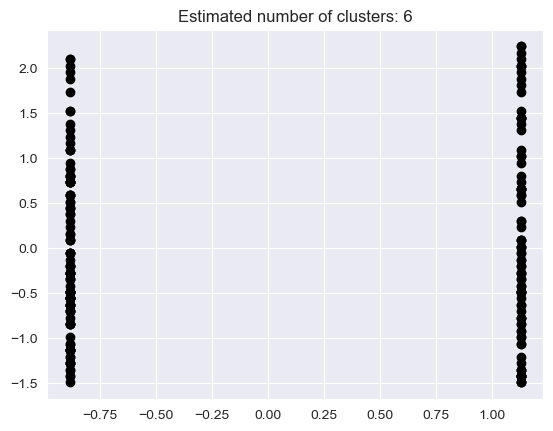

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
# Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 6 Hierarchical CLustering

• Similar working like K-Mean clustering but the difference is that we create a tree structure

• Divisive Clustering

• Divisive clustering is known as the top-down approach. We take a large cluster and start
dividing it into two, three, four, or more clusters

• Agglomerative Clustering

• Agglomerative clustering is known as a bottom-up approach. Consider it as bringing things
together

# 6.0.1 Dendogram

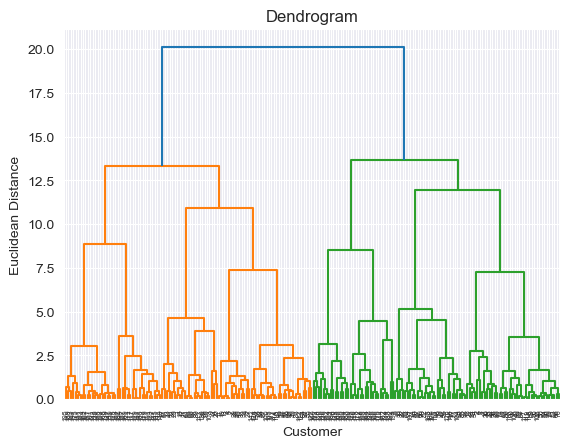

In [81]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

Observation: * Based on the dendogram, we choose 3 cluster

C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters : {0, 1, 2}
Silhouette Coefficient: 0.248


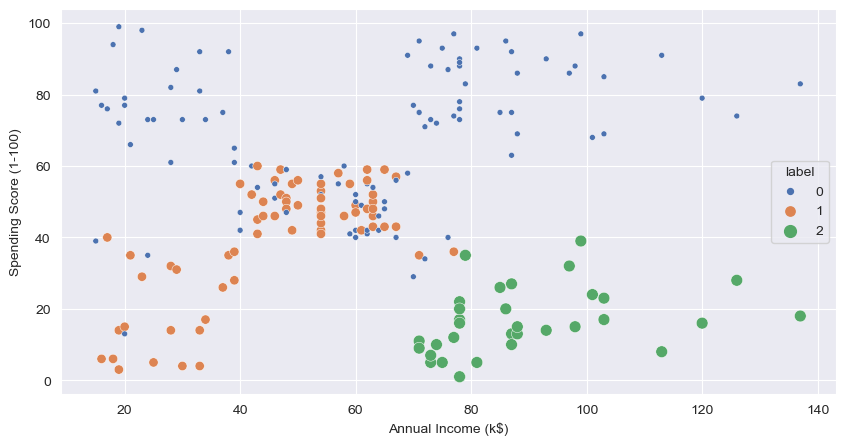

In [83]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels = hc.fit_predict(X)
print(f"Clusters : {set(labels)}")
df['label'] = labels
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

"""Label Plots for Annual Income (k$) and Spendng Score (1-100)"""
plt.figure(figsize = (10,5))
# Pass the positional arguments as keyword arguments
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df.label, palette="deep", size=df.label)

# Comment out the code that plots the centroids
# sns.scatterplot(x=centroids[:,2], y=centroids[:,3], s=200, color='red')
plt.show()

Observation: * We chose 3 cluster because for more than 3 cluster there is overlapping in the
cluster